Datasets used: 110 

595_fri_c0_1000_10.tsv.tabular
1030_ERA.tsv.tabular
627_fri_c2_500_10.tsv.tabular
647_fri_c1_250_10.tsv.tabular
583_fri_c1_1000_50.tsv.tabular
597_fri_c2_500_5.tsv.tabular
648_fri_c1_250_50.tsv.tabular
4544_GeographicalOriginalofMusic.tsv.tabular
574_house_16H.tsv.tabular
650_fri_c0_500_50.tsv.tabular
485_analcatdata_vehicle.tsv.tabular
227_cpu_small.tsv.tabular
706_sleuth_case1202.tsv.tabular
649_fri_c0_500_5.tsv.tabular
651_fri_c0_100_25.tsv.tabular
617_fri_c3_500_5.tsv.tabular
503_wind.tsv.tabular
631_fri_c1_500_5.tsv.tabular
1029_LEV.tsv.tabular
598_fri_c0_1000_25.tsv.tabular
579_fri_c0_250_5.tsv.tabular
560_bodyfat.tsv.tabular
1028_SWD.tsv.tabular
601_fri_c1_250_5.tsv.tabular
218_house_8L.tsv.tabular
590_fri_c0_1000_50.tsv.tabular
615_fri_c4_250_10.tsv.tabular
556_analcatdata_apnea2.tsv.tabular
624_fri_c0_100_5.tsv.tabular
604_fri_c4_500_10.tsv.tabular
607_fri_c4_1000_50.tsv.tabular
608_fri_c3_1000_10.tsv.tabular
523_analcatdata_neavote.tsv.tabular
197_cpu_act

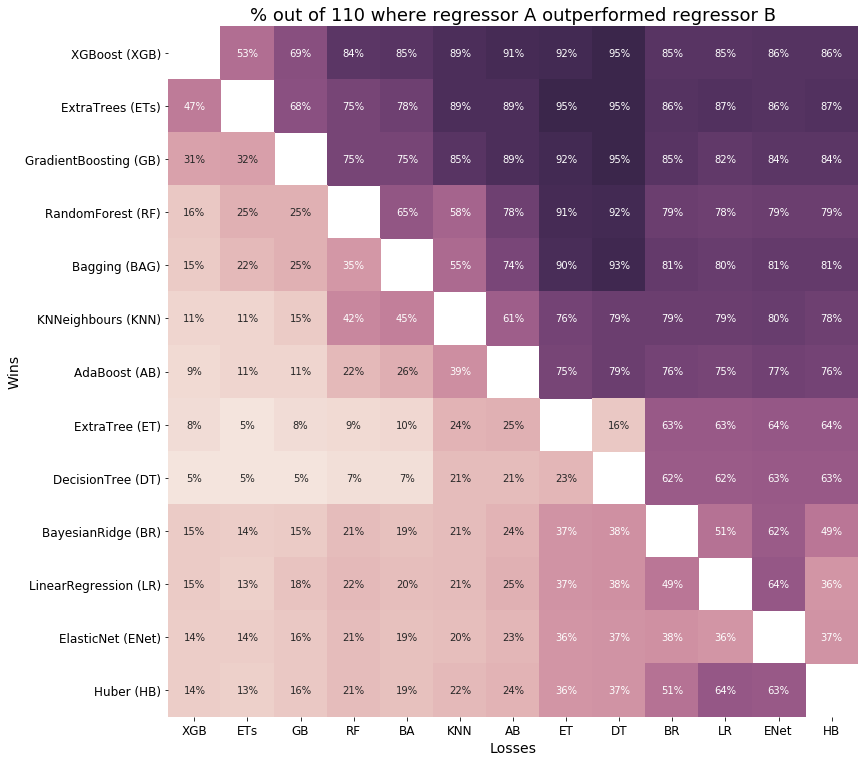

Total time taken: 7 seconds


In [29]:
import sys
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
import os
import numpy as np
import warnings
import seaborn as sb
import operator

import plotly
import plotly.graph_objs as go
from plotly import tools
import plotly.io as pio


warnings.filterwarnings('ignore')

start_time = time.time()
folder_name = "tuning/"
clf_names_dir = os.listdir(folder_name)

file_obj = open("dataset_names_paper.csv", "r")
dataset_names = file_obj.read()
dataset_names_list = dataset_names.split("\n")
dataset_names_list = list(filter(None, dataset_names_list))
print("Datasets used: %d \n" % len(dataset_names_list))
print(dataset_names)
dataset_names = dataset_names_list

clf_names = list()
r2_dict = dict()
clf_sum_r2 = dict()

print('Plotting heatmap...')

for clf in clf_names_dir:
    data_path = folder_name + clf
    files = [f for f in os.listdir(data_path)]
    r2_scores = list()
    r2_dict[clf] = list()
    for f_name in files:
        if f_name in dataset_names:
            f_path = data_path + "/" + f_name
            df = pd.read_csv(f_path, sep="\t")
            rank_test_score = df[df["rank_test_score"] == 1]
            mean_test_score = rank_test_score["mean_test_score"]
            r2_scores.append(mean_test_score.iloc[0])
    r2_dict[clf] = r2_scores
    clf_sum_r2[clf] = np.sum(r2_scores)
    clf_names.append(clf)
n_clf = len(clf_names)

sorted_clf = sorted(clf_sum_r2.items(), key=lambda kv: kv[1], reverse=True)
clf_sorted = [a[0] for a in sorted_clf]

model_nice_dict = {
    'XGBoost': 'XGB',
    'ExtraTrees': 'ETs',
    'GradientBoosting': 'GB',
    'RandomForest': 'RF',
    'Bagging': 'BA',
    'KNNeighbours': 'KNN',
    'AdaBoost': 'AB',
    'ExtraTree': 'ET',
    'DecisionTree': 'DT',
    'BayesianRidge': 'BR',
    'LinearRegression': 'LR',
    #'LinearSVR': 'LSVR',
    #'Lars': 'LA',
    'ElasticNet': 'ENet',
    #'SGD': 'SGD',
    'Huber': 'HB'
}

model_nice_dict_y = {
    'XGBoost': 'XGBoost (XGB)',
    'ExtraTrees': 'ExtraTrees (ETs)',
    'GradientBoosting': 'GradientBoosting (GB)',
    'RandomForest': 'RandomForest (RF)',
    'Bagging': 'Bagging (BAG)',
    'KNNeighbours': 'KNNeighbours (KNN)',
    'AdaBoost': 'AdaBoost (AB)',
    'ExtraTree': 'ExtraTree (ET)',
    'DecisionTree': 'DecisionTree (DT)',
    'BayesianRidge': 'BayesianRidge (BR)',
    'LinearRegression': 'LinearRegression (LR)',
    #'LinearSVR': 'LinearSVR (LSVR)',
    #'Lars': 'Lars (LA)',
    'ElasticNet': 'ElasticNet (ENet)',
    #'SGD': 'SGD',
    'Huber': 'Huber (HB)'
}

x_labels = list(model_nice_dict.values())
y_labels = list(model_nice_dict_y.values())

# plot heatmap
performance_datasets = np.zeros(shape=(n_clf,n_clf), dtype=float)

for x, clf_x in enumerate(clf_sorted):
    for y, clf_y in enumerate(clf_sorted):
        x_perf = r2_dict[clf_x]
        y_perf = r2_dict[clf_y]
        n_datasets = len(r2_dict[clf_x])
        x_g_y = len([1 for (a,b) in zip(x_perf, y_perf) if a > b]) / float(n_datasets)
        y_g_x = len([1 for (a,b) in zip(x_perf, y_perf) if b > a]) / float(n_datasets)
        performance_datasets[x][y] = x_g_y
        performance_datasets[y][x] = y_g_x

mask_matrix = []
for x in range(n_clf):
    for y in range(n_clf):
        mask_matrix.append(x == y)
mask_matrix = np.array(mask_matrix).reshape(n_clf, n_clf)

#rcParams['font.family'] = "Times New Roman"

plt.figure(figsize=(12, 12))
sb.heatmap(np.round((performance_datasets), 2), fmt='0.0%',
           mask=mask_matrix,
           cmap=sb.cubehelix_palette(500, light=0.95, dark=0.15),
           square=True, annot=True, vmin=0., vmax=1.0,
           xticklabels=x_labels, yticklabels=y_labels, cbar=False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Losses', fontsize=14)
plt.ylabel('Wins', fontsize=14)
plt.title('% out of '+ str(n_datasets) +' where regressor A outperformed regressor B', fontsize=18)
h = plt.gcf()
plt.tight_layout()
plt.show()

end_time = time.time()
print('Total time taken: %d seconds' % int(end_time - start_time))


Plotting regressors vs datasets...


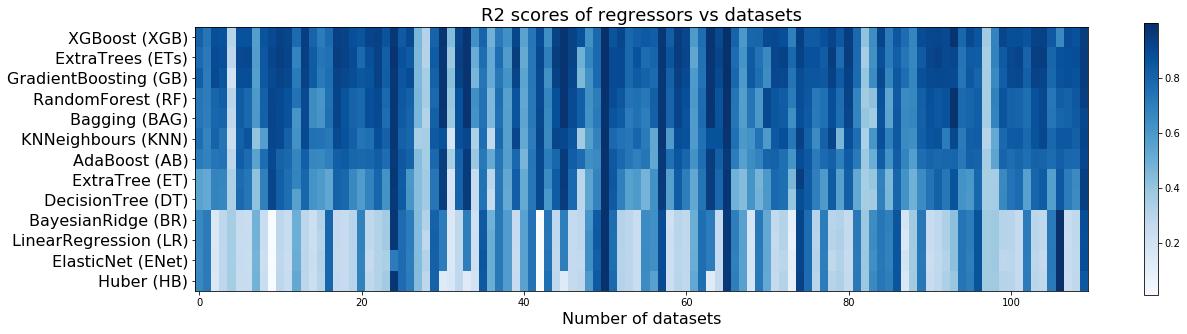

In [26]:
# plot r2-clf matrix
r2_clf_matrix = np.zeros(shape=(n_clf, n_datasets), dtype=float)
plt.figure(figsize=(20, 20))

print('Plotting regressors vs datasets...')

for x, clf in enumerate(clf_sorted):
    r2_clf_matrix[x] = r2_dict[clf]

plt.title('R2 scores of regressors vs datasets', size=18)
plt.xlabel('Number of datasets', size=16)
plt.yticks(range(n_clf), y_labels, size=16)
plt.imshow(r2_clf_matrix, cmap='Blues', aspect=2.5)
plt.colorbar(shrink=0.25)
plt.show()

Processing results for optimisation ...
Processing results for no optimisation ...


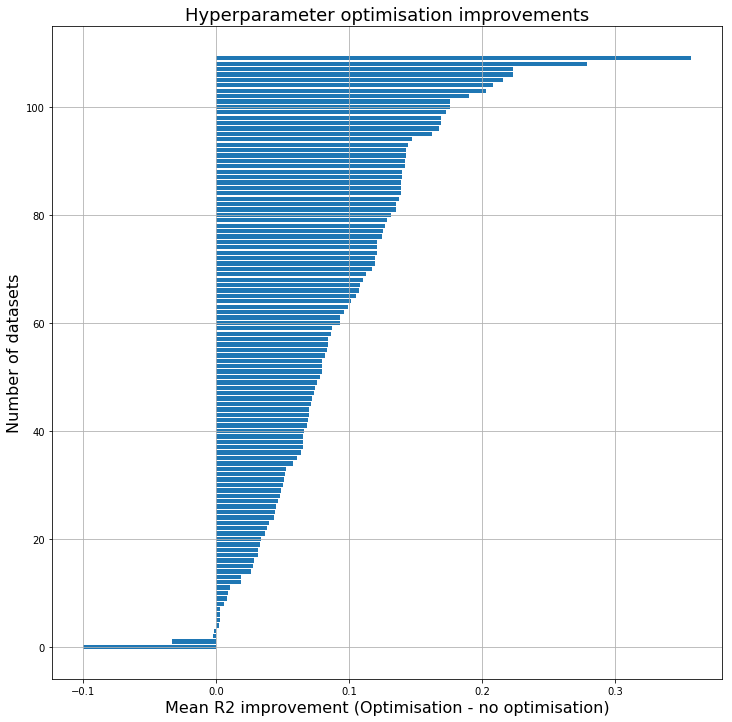

In [27]:
# plot average performance on datasets

folder_name_tuning = "tuning/"
folder_name_no_tuning = "no_tuning/"
clf_names_dir_tuning = os.listdir(folder_name_tuning)
clf_names_dir_no_tuning = os.listdir(folder_name_no_tuning)

file_obj = open("file_names.txt", "r")
dataset_names = file_obj.read()
dataset_names = dataset_names.split("\n")

clf_names_tuning = list()
clf_mean_r2_tuning = list()
r2_dict_tuning = dict()
fit_time_dict_tuning = dict()

print("Processing results for optimisation ...")

for clf in clf_names_dir_tuning:
    data_path = folder_name_tuning + clf
    files = [f for f in os.listdir(data_path)]
    r2_scores = list()
    common_fileset = list()
    for f_name in files:
        if f_name in dataset_names: 
            common_fileset.append(f_name)
            f_path = data_path + "/" + f_name
            df = pd.read_csv(f_path, sep="\t")
            rank_test_score = df[df["rank_test_score"] == 1]
            mean_test_score = rank_test_score["mean_test_score"]
            r2_scores.append(mean_test_score.iloc[0])
    clf_names_tuning.append(clf)
    r2_dict_tuning[clf] = r2_scores

clf_names_no_tuning = list()
clf_mean_r2_no_tuning = list()
r2_dict_no_tuning = dict()
fit_time_dict_no_tuning = dict()

print("Processing results for no optimisation ...")

for clf in clf_names_dir_no_tuning:
    data_path = folder_name_no_tuning + clf
    files = [f for f in os.listdir(data_path)]
    r2_scores = list()
    for f_name in files:
        if f_name in dataset_names:
            f_path = data_path + "/" + f_name
            df = pd.read_csv(f_path, sep="\t")
            rank_test_score = df[df["rank_test_score"] == 1]
            mean_test_score = rank_test_score["mean_test_score"]
            r2_scores.append(mean_test_score.iloc[0])
    clf_names_no_tuning.append(clf)
    r2_dict_no_tuning[clf] = r2_scores

n_datasets = len(common_fileset)
n_clf = len(clf_names_no_tuning)
clf_datasets_perf = np.zeros(shape=(n_clf, n_datasets), dtype=float)

for x, clf in enumerate(clf_names_no_tuning):
    tuning_perf = r2_dict_tuning[clf]
    no_tuning_perf = r2_dict_no_tuning[clf]
    diff = [(a-b) for a,b in zip(tuning_perf, no_tuning_perf)]
    clf_datasets_perf[x] = diff

mean_perf_datasets = np.mean(clf_datasets_perf, axis=0)

plt.figure(figsize=(12, 12))
y_pos = np.arange(n_datasets)
plt.barh(y_pos, sorted(mean_perf_datasets))
plt.xlabel('Mean R2 improvement (Optimisation - no optimisation)', size=16)
plt.ylabel('Number of datasets', size=16)
plt.title('Hyperparameter optimisation improvements', size=18)
plt.grid(True)
plt.show()


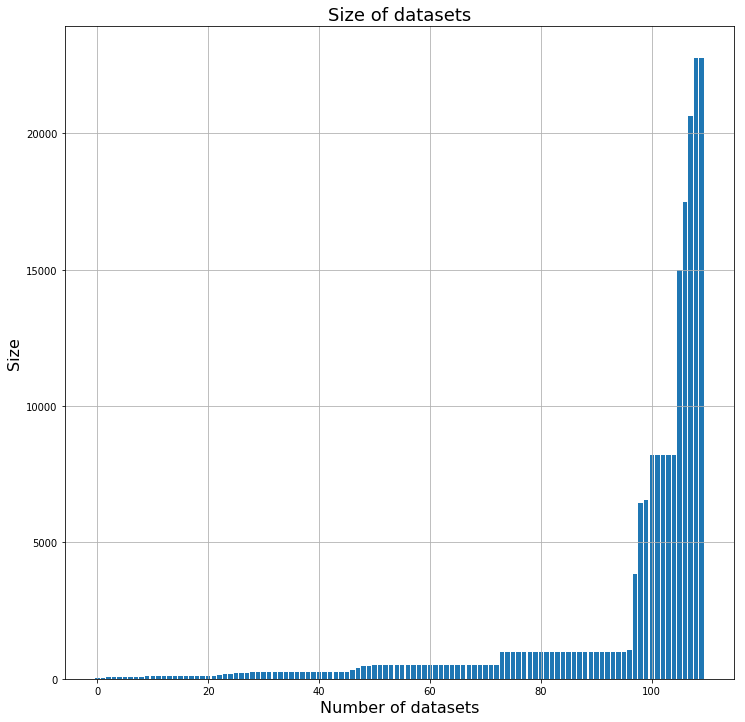

In [42]:
# plot dataset sizes

data_folder_name = "data_used/"
d_lengths = list()

for f_name in dataset_names:
    f_name_modified = f_name.split(".")
    f_name_modified = ".".join(f_name_modified[0:len(f_name_modified) - 1])
    ds_path = data_folder_name + f_name_modified
    df = pd.read_csv(ds_path, sep="\t")
    d_lengths.append(len(df))
    
plt.figure(figsize=(12, 12))
y_pos = np.arange(n_datasets)
plt.bar(y_pos, sorted(d_lengths))
plt.xlabel('Number of datasets', size=16)
plt.ylabel('Size', size=16)
plt.title('Size of datasets', size=18)
plt.grid(True)
plt.show()